# Signals Generation
## For FFT in Fortran testing

In [1]:
# Usual imports
import matplotlib.pyplot as plt               # for plotting
import numpy as np                            # matrix handling


In [2]:
# Functions for data gen:
def signal_gen(numpoints, freqs, amps):
    x = np.linspace(0, 2*np.pi, num=numpoints)
    
    if(len(freqs)==len(amps)):
        signal = amps[0]*np.sin(2*np.pi*x*freqs[0])
        
        for i in range(1,len(freqs)):
            signal = signal + amps[i]*np.sin(2*np.pi*x*freqs[i])
            
        return signal
            
    else:
        "Invalid inputs"
    
def signal_gaus(numpoints,mu,sig):
    x = np.arange(0,1,1/numpoints)
    
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


In [3]:
def plot_sig_outsig_freq(freqs,amps,N,xmax=0):
    input_signal = signal_gen(N,freqs,amps)
    np.savetxt('input_signal.csv', input_signal, delimiter=',')
    
    ! echo input_signal.csv | ./test
    
    # Read in the file
    with open("output_signal.csv", 'r') as file :
        filedata = file.read()
        filedata = filedata.replace('(', '')
        filedata = filedata.replace(')', '')

    # Write the file out again
    with open("output_signal.csv", 'w') as file:
        file.write(filedata)

    signal_out = np.genfromtxt('./output_signal.csv', delimiter=',')
    signal_out = signal_out[:,0]
    
    signal_in = input_signal
    
    x = np.linspace(0, N/(2*np.pi), num=N)
    
    plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

    plt.subplot(1, 2, 1)
    plt.plot(np.arange(0,len(signal_in)), signal_in,color='crimson')
    plt.title('Signal In')

    plt.subplot(1, 2, 2)
    plt.plot(x,np.abs(signal_out))
    
    for i in range(len(freqs)):
        plt.vlines(freqs[i],0,np.max(signal_out),color='crimson', linestyles='--',alpha=0.7)
        
    if xmax > 0:
        plt.xlim(0,xmax)
    else:
        plt.xlim(0,freqs[i]*(1+0.2))
    
    plt.title('Signal Out')
    
def plot_sig_outsig(inputsig):
    ! echo $inputsig | ./test
    
    # Read in the file
    with open("output_signal.csv", 'r') as file :
        filedata = file.read()
        filedata = filedata.replace('(', '')
        filedata = filedata.replace(')', '')

    # Write the file out again
    with open("output_signal.csv", 'w') as file:
        file.write(filedata)

    signal_out = np.genfromtxt('./output_signal.csv', delimiter=',')
    signal_out = signal_out[:,0]
    
    signal_in = np.genfromtxt(inputsig)

    plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

    plt.subplot(1, 2, 1)
    plt.plot(np.arange(0,len(signal_in)), signal_in,color='crimson')
    plt.title('Signal In')

    plt.subplot(1, 2, 2)
    plt.plot(np.abs(signal_out))
    plt.title('Signal Out')

In [4]:
! gfortran ./fft.f90 -o test -lfftw3 -lm -Wall

 --------------------------------------------
 +          FOURIER TRANSFORM TEST          +
 --------------------------------------------
 + Select file:  + Folder:input_signal.csv    
 --------------------------------------------
 + Loading Data
 +   Size of Data:       10000
 + Data loaded
 +
 + Signal:
 +               (0.0000000000000000,0.0000000000000000)
 +         (5.92208715010344930E-002,0.0000000000000000)
 +              (0.11842568064575702,0.0000000000000000)
 +              (0.17759837110712900,0.0000000000000000)
 +              (0.23672289861432000,0.0000000000000000)
 +     ...
 +
 + Performing Fourier Transform...
 +   1/2 => [OK]
 +   2/2 => [OK]
 + DONE!
 +
 + Output Signal:
 +               (1350.1173531073816,0.0000000000000000)
 +              (1375.7578531712936,-118.66273544032748)
 +              (1460.8859191616766,-257.67662527622315)
 +              (1638.1005905900111,-450.82274955218520)
 +              (2007.3087462901981,-782.79075491841468)
 +     ...

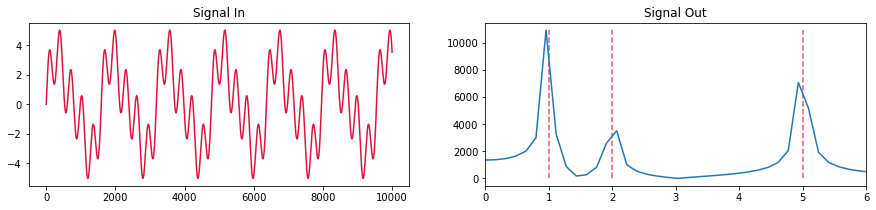

In [5]:
plot_sig_outsig_freq([1,2,5],[3,1,2],10000)